In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime


In [18]:
uk = pd.read_csv('UK_Economic_Data_2007.csv')
uk['Period'] = pd.to_datetime(uk['Period'])
uk.set_index('Period', inplace=True)
us = pd.read_csv('US_Economic_data.csv')
us['Period'] = pd.to_datetime(us['Period'])
us.set_index('Period', inplace=True)
df = pd.read_csv('UK_Economic_Data.csv')
df['Period'] = pd.to_datetime(df['Period'])
df.set_index('Period', inplace=True)


# Wealth distribution will dictate the direction of asset prices over the next 10 years. 

Most economists look back at the period between 2010-2019 and accept that asset prices went up due to a low interest rate environment, but few analyse why we were in that low interest rate environment for so long. It is my belief, that understanding this reason is the missing piece in the puzzle. The goal of this paper is to show that wealth inequality dictated monetary/fiscal policy between 2010-2019 and then again during COVID, and that the effects of this stimulus will heavily influence assets prices over the next ten years. 

This paper argues, if you know the reason for stimulus, you understand where the money is, you have a good idea which asset classes are likely receive this money. To avoid confusion, I will clearly define the major topics of this paper such as what wealth/wealth inequality is, and the effects these have on the economy. I have largely focused on the UK, but when you look at the US or any other major Western economy, the picture is very similar.  

### What is wealth?
The spending habits of the wealthy are very different to the avg. person. The wealthy spend a much lower % of their income relative to the avg. consumer and have more to save. Wealthy people typically do not hold their savings in cash, they hold it in assets, be it; resources, property, land, stocks, debt, infrastructure, technology etc. Wealth is assets, not income. 

### What is wealth inequality?
This is about who owns the assets. A wealth equal economy means not having to borrow vast amounts of money to own assets, with some passive income from assets, to enable spending in the real economy. Post WWII to the 1990s. An unequal economy is when assets used by everyone, are owned by a minority of people and the vast majority of people pay them to use those assets, meaning less money to spend in the real economy. 

### What are the effects on the economy?
The theory from economists post 2008 is that you combat low growth with low interest rates and quantitative easing. These tools are supposed to get people out spending and businesses investing, but instead I believe the below happens:

Demand for consumption is low: the avg. consumer spends an increasing amount of their income on the use of or purchase of assets (avg. UK mortgage 24% of income and avg. rent is 38% of income). This means less money to spend in real economy. 

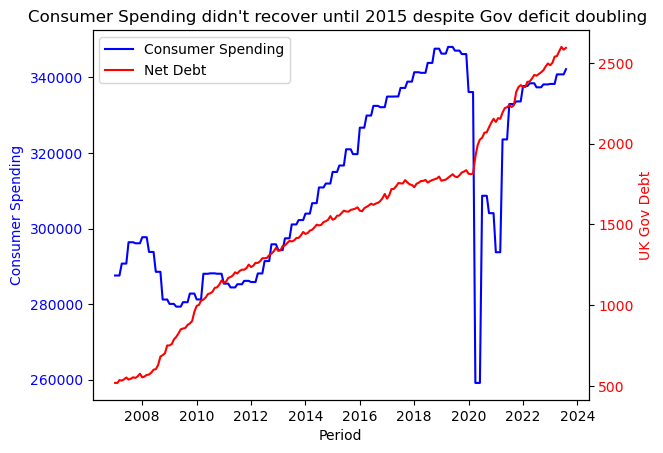

In [33]:
# Plotting Consumer Spending against Gov Deficit 
fig, ax1 = plt.subplots()


ax1.plot(uk.index, uk['Consumer Spending'], color='blue', label='Consumer Spending')
ax1.set_xlabel('Period')
ax1.set_ylabel('Consumer Spending', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(uk.index, uk['Net Debt'], color='red', label='Net Debt')
ax2.set_ylabel('UK Gov Debt', color='red')
ax2.tick_params(axis='y', labelcolor='red')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.title("Consumer Spending didn't recover until 2015 despite Gov deficit doubling ")
plt.show()



Low wages: less demand in real economy means less spending so less workers are needed, on top of job replacement due to tech innovation. 

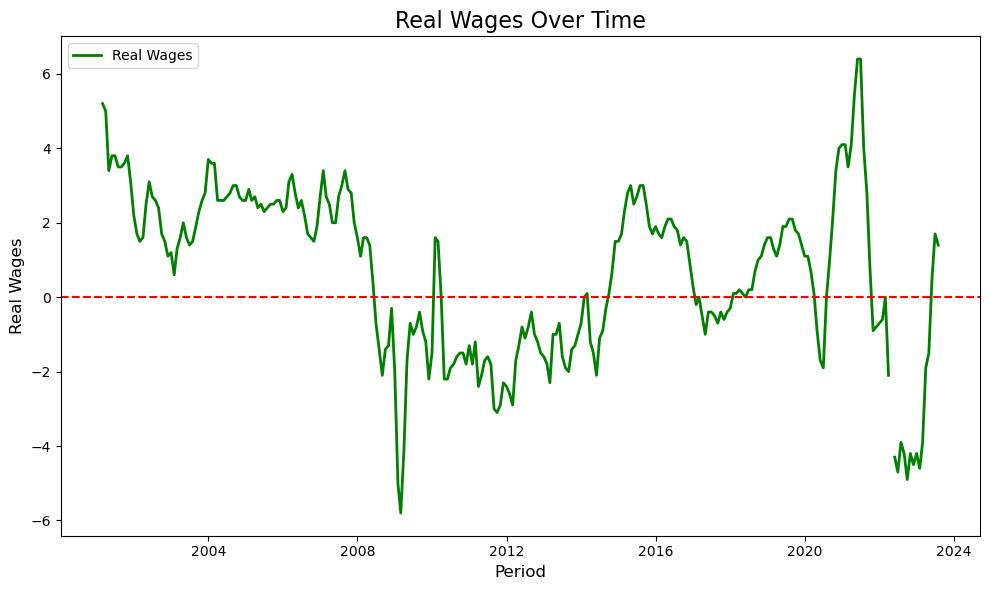

In [66]:
# Plotting Real Wages 
df_copy = df.copy()
df_copy['Real Wages'] = df_copy['Nominal Pay Growth'] - df_copy['CPI']

plt.figure(figsize=(10, 6))  
plt.plot(df_copy.index, df_copy['Real Wages'], color='green', linewidth=2, label='Real Wages')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Real Wages Over Time', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Real Wages', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()


High Asset prices: low consumer spending since 2010 has resulted in low rates of real investment and high asset price growth, as investors compete for existing assets. 

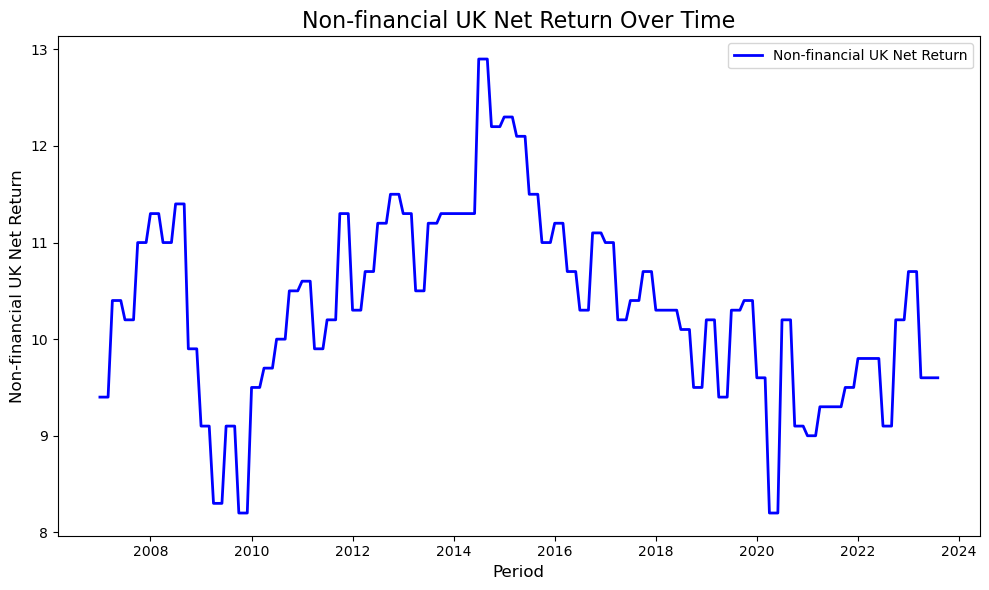

In [29]:
# Plotting Gold/House Prices/FTSE
uk_from_2009 = uk.loc['2009':]
uk_returns_from_2009 = uk_from_2009.copy()


uk_returns_from_2009['Gold_Return'] = uk_returns_from_2009['Gold'].pct_change().add(1).cumprod() - 1
uk_returns_from_2009['House_Price_Return'] = uk_returns_from_2009['Average House Price'].pct_change().add(1).cumprod() - 1
uk_returns_from_2009['FTSE_Return'] = uk_returns_from_2009['FTSE 100'].pct_change().add(1).cumprod() - 1


plt.figure(figsize=(10, 6))  
plt.plot(uk_returns_from_2009.index, uk_returns_from_2009['Gold_Return'], label='Gold Cumulative Return')
plt.plot(uk_returns_from_2009.index, uk_returns_from_2009['House_Price_Return'], label='House Price Cumulative Return')
plt.plot(uk_returns_from_2009.index, uk_returns_from_2009['FTSE_Return'], label='FTSE 100 Cumulative Return')
plt.xlabel('Period')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of UK Assets')
plt.legend()
plt.show()

Economic concentration: the more unequal the economy becomes the more wealthy have to spend relative to everyone else. The spread in the UK and the US has become particularly noticeable.

Luxury spending: the expenditure that is spent by the wealthy is concentrated on luxury industries. LVMH stock made an all time high in April 2023.

[*********************100%***********************]  3 of 3 completed


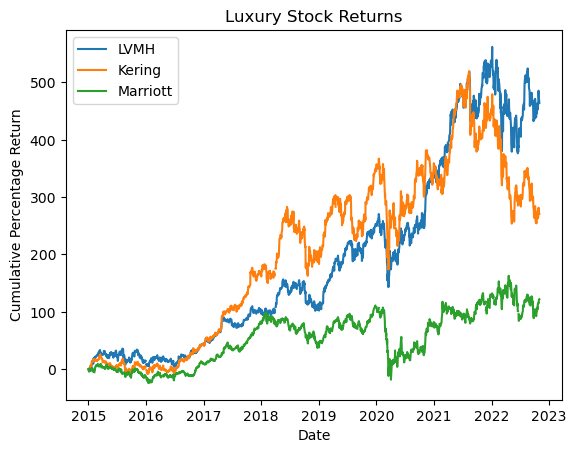

In [30]:
# plotting luxury stock returns 
tickers = {
    'LVMH': 'MC.PA',
    'Kering': 'KER.PA',
    'Marriott': 'MAR',
}

stock_data = yf.download(list(tickers.values()), start='2015-01-01', end='2022-11-01')

cumulative_returns = (stock_data['Adj Close'] / stock_data['Adj Close'].iloc[0] - 1) * 100

for ticker, symbol in tickers.items():
    plt.plot(cumulative_returns[symbol], label=ticker)

plt.title('Luxury Stock Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Return')
plt.legend()
plt.show()


Geographic concentration: Areas without wealthy people cease to function, people end up following the money.

Expensive living costs: competition for accommodation leads to density in urban areas and high rents. 

Cashflows: In a wealth unequal economy, the avg. consumer gives a large portion of their income to the wealthy in the form of rent, mortgage, energy bills, insurance, food bills etc. This increase in income means more money available to buy assets. This compounds the worse inequality gets. 

In [ ]:
# plotting non-financial company returns 
plt.figure(figsize=(10, 6))  
plt.plot(uk.index, uk['Non-financial UK Net Return'], color='blue', linewidth=2, label='Non-financial UK Net Return')
plt.title('Non-financial UK Net Return Over Time', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Non-financial UK Net Return', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()

Government spending cuts: governments aren’t able to increase taxes on ordinary people, so instead they spend less on public services - austerity. In fact, many governments try to lower taxes to attract the wealthy in the hope of increased spending/investment. 

In [ ]:
# Plotting Deficit Expansion and House Prices
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(uk.index, uk['Net Debt'], color='blue', label='Net Debt')
ax1.set_ylabel('Net Debt', color='blue')
ax2 = ax1.twinx()
ax2.plot(uk.index, uk['Average House Price'], color='green', label='Avg House Price')
ax2.set_ylabel('Avg House Price', color='green')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')
plt.xlabel('Period')
plt.title('Net Debt and Average House Price Over Time')
plt.tight_layout()
plt.show()

# Why the nature of COVID stimulus is so key

In [45]:
#Plotting UK and US Gov Deficits
net_debt = uk[['Net Debt']].copy()
us_debt = us[['Net Debt']].copy()
merged_debt = pd.merge(net_debt, us_debt, on='Period')
merged_debt.rename(columns={'Net Debt_x': 'UK Gov Debt', 'Net Debt_y': 'US Gov Debt'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(merged_debt.index, merged_debt['UK Gov Debt'], color='blue', label='UK Gov Debt')
ax1.set_xlabel('Period')
ax1.set_ylabel('UK Gov Debt', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(merged_debt.index, merged_debt['US Gov Debt'], color='red', label='US Gov Debt')
ax2.set_ylabel('US Gov Debt', color='red')
ax2.tick_params(axis='y', labelcolor='red')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')
plt.title('UK Gov Debt and US Gov Debt over Time')
plt.show()

,Net Debt_x,Net Debt_y
Period,,
2007-10-01,548.7,9229.172
2008-04-01,569.8,9492.006
2008-07-01,602.7,10024.725
2008-10-01,689.6,10699.805
2009-04-01,802.5,11545.275
2009-07-01,854.7,11909.828
2009-10-01,885.7,12311.349
2010-04-01,1033.7,13201.792
2010-07-01,1072.7,13561.622


We know from the above that the flows of wealth are skewed and COVID significantly increased this when governments rapidly expanded their deficits - UK by c.£700bn and the US by c.$8tn. When governments spend without increasing tax, that increases money in society, so we know that money is in the economy. 

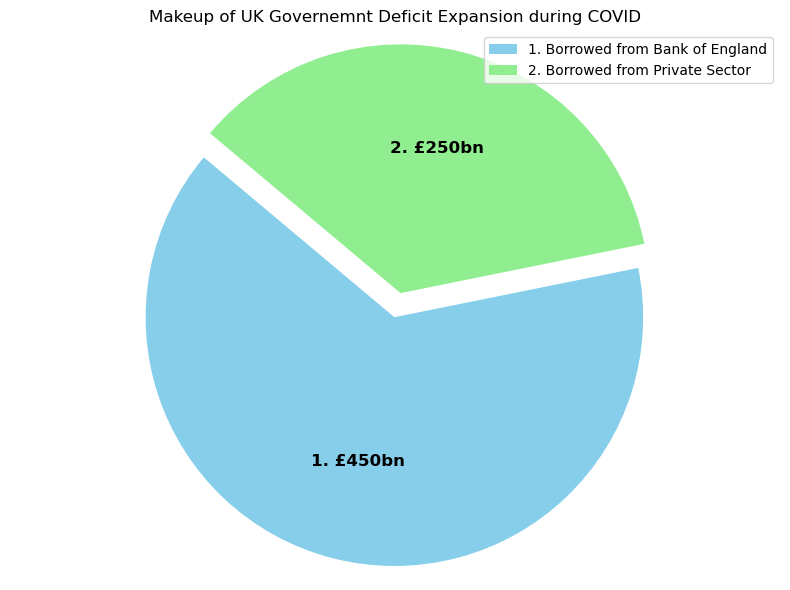

In [49]:
# Creating Pie Chart to show split of UK Deficit expansion
borrowed_boe = 450 
borrowed_private_sector = 250  
total_deficit = borrowed_boe + borrowed_private_sector

sizes = [borrowed_boe, borrowed_private_sector]
labels = ['1. Borrowed from Bank of England', '2. Borrowed from Private Sector']
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=None, colors=colors,
                                   autopct='', startangle=140, textprops={'color': 'black'})
plt.setp(autotexts, size=12, weight="bold")
autotexts[0].set_text(f'1. £{borrowed_boe}bn')
autotexts[1].set_text(f'2. £{borrowed_private_sector}bn')
plt.title('Makeup of UK Governemnt Deficit Expansion during COVID')
plt.axis('equal')
plt.legend(wedges, labels, loc="best")
plt.tight_layout()
plt.show()

If we dissect this stimulus further and take the UK as an example:
£450bn was borrowed from the central bank (BoE), its clean to analyse, its essentially fresh money into society and we know until the deficit is reduced, that money is held by someone. 
The £250bn borrowed from the private sector is slightly different and actually compounds wealth concentration. This is because the government borrowed £250bn from wealthy investors, injected it into the economy and then due to wealth flows, wealthy investors  eventually accumulated it. 

The key is that a lot of economists see the COVID deficit expansion as lending money into the economy, when it wasn’t. Is has no maturity or duration. It was handed out fiscally. The effects of this stimulus is:
 - Currency devaluation
 - Further compounding of wealth concentration as the money ultimately flows up to those with assets

# So how is this all relevant to markets?


### 1. Currency Devaluation
When the money supply is increased by such large levels, this is likely to lead to sharp levels of both asset and CPI inflation, which is what we have seen in the past 24 months, this also happened in 2011, although to a lesser extent. Inflation and currency devaluation are arguably the same thing and currency devaluation leads to higher asset prices by design. 

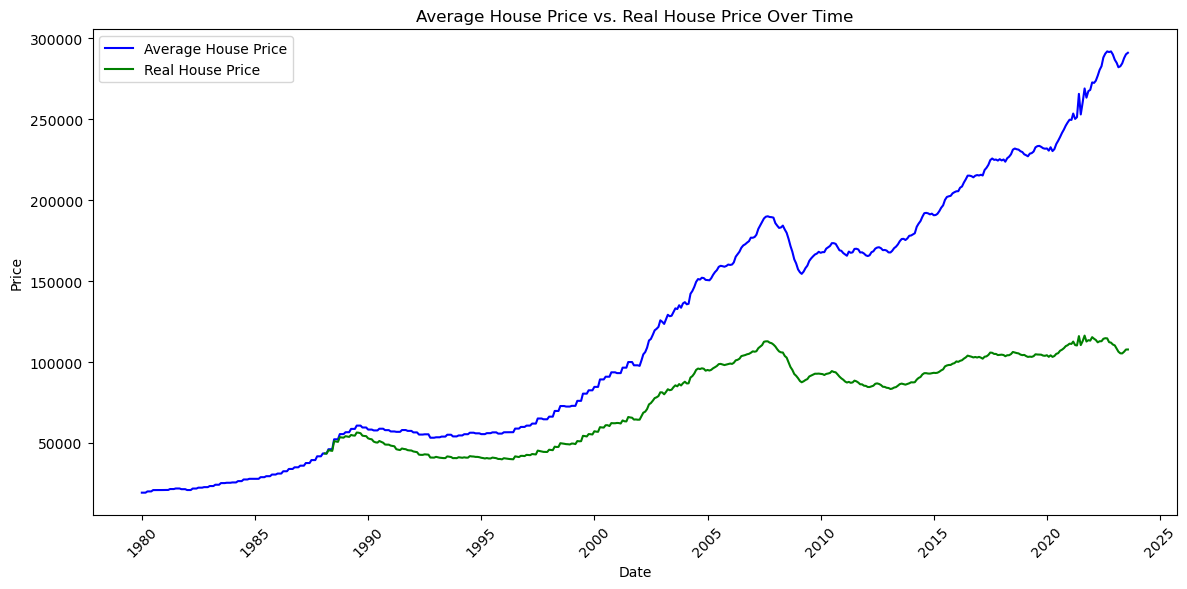

In [56]:
# Plotting Real House Price Growth 
base_year_cpi = df.loc[df.index == '1988-02-01', 'CPI Index'].values[0]
df['CPI Index'] = (df['CPI Index'] / base_year_cpi) * 100
df['Real_House_Price'] = (df['Average House Price'] / df['CPI Index']) * 100

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Average House Price'], label='Average House Price', color='blue')
ax.plot(df.index, df['Real_House_Price'], label='Real House Price', color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Average House Price vs. Real House Price Over Time')
plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

### 2. Competition for assets
Knowing that the majority of the deficit expansion is likely to have settled with wealthy investors who have a preference for assets, we know who has the spending power for the foreseeable. If Governments are going to run such large deficits, then someone needs to be convinced to hold the cash/debt in the long run and sit on negative real rates. We already saw this during COVID, but we will likely see a continued deployment of capital back into assets. There are similarities between now and 2011, and asset proceeded to perform extremely well between 2010-2019. 

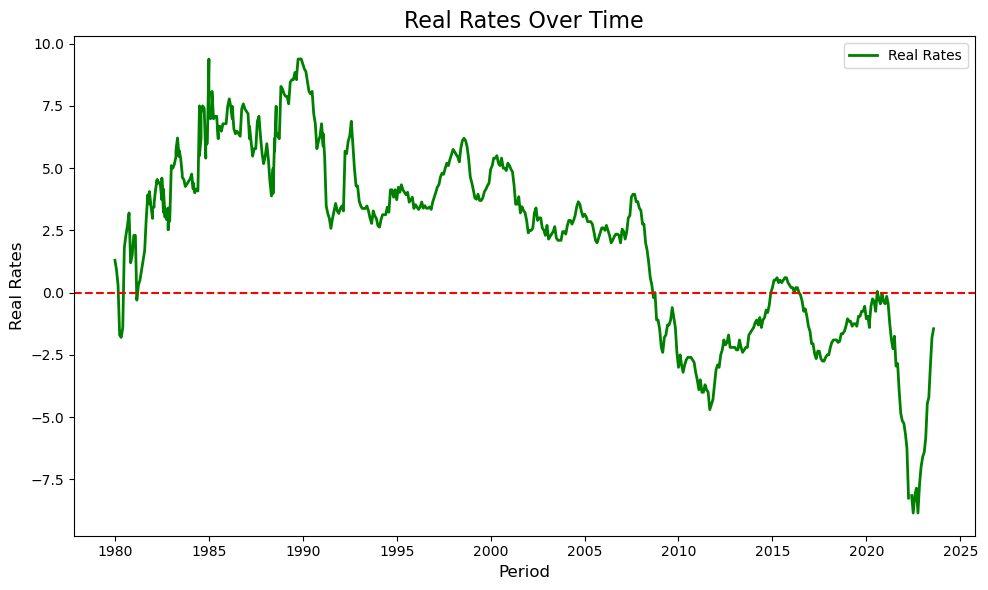

In [81]:
# Chart showing Real Rates
df_copy = df.copy()
df_copy['Real Rates'] = df_copy['Rate'] - df_copy['CPI']


plt.figure(figsize=(10, 6))
plt.plot(df_copy.index, df_copy['Real Rates'], color='green', linewidth=2, label='Real Rates')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Real Rates Over Time', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Real Rates', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()

### 3. Predicting monetary/fiscal policy
Knowing that there is an underlying issue with wealth inequality/living standards, with no obvious solution from political parties on either side of the spectrum, there is a high likelihood that central bank intervention will continue. It just depends in what form. Do Governments continue to respond to economic shocks with drastic deficit expansion, which is CPI inflationary or do Governments move back to spending cuts (Austerity in the UK) similar to what we saw post 2008 GFC which will kill spending, enable low interest rates and lead to steady asset price inflation. 

/Users/JGP/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/JGP/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/JGP/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/JGP/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

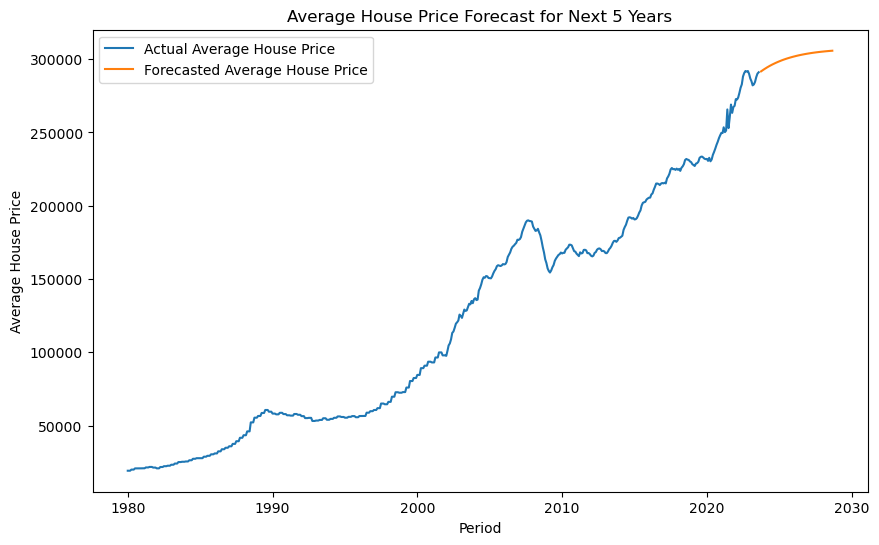

In [80]:
# Plotting House Price forecast

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Average House Price'], order=(1, 1, 1))  
results = model.fit()
forecast = results.forecast(steps=60)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Average House Price'], label='Actual Average House Price')
plt.plot(pd.date_range(start=df.index[-1], periods=61, freq='M')[1:], forecast, label='Forecasted Average House Price')
plt.xlabel('Period')
plt.ylabel('Average House Price')
plt.legend()
plt.title('Average House Price Forecast for Next 5 Years')
plt.show()

### 4.  The importance of debt in order to keep society/the economy going. 
In a world where one’s purchasing power is continuously decreasing, the only way for government’s to keep the global economy going to continue to facilitate lending. Take the UK for example, the need to have a healthy home owning middle class is absolutely key to any government manifesto. We are likely to see a continued growth in investment products similar to bonds, as wealthy investors monopolise on the increasing need for the avg. consumer to use debt to make purchases, particularly housing.

/Users/JGP/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/JGP/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/JGP/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/JGP/opt/anaconda3/envs/Finance/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction resul

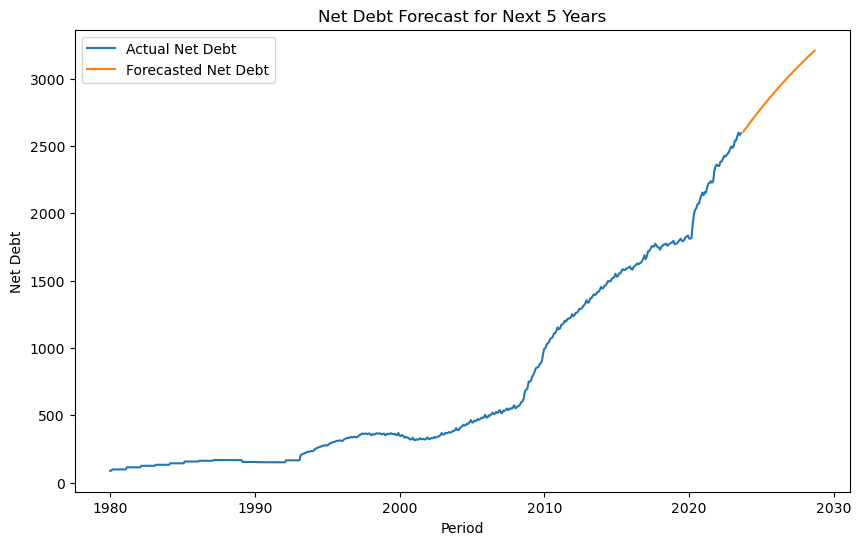

In [79]:
# Plotting Deficit forecast
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Net Debt'], order=(1, 1, 1)) 
results = model.fit()
forecast = results.forecast(steps=60)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Net Debt'], label='Actual Net Debt')
plt.plot(pd.date_range(start=df.index[-1], periods=61, freq='M')[1:], forecast, label='Forecasted Net Debt')
plt.xlabel('Period')
plt.ylabel('Net Debt')
plt.legend()
plt.title('Net Debt Forecast for Next 5 Years')
plt.show()


## Thesis invalidation

The most likely source of thesis invalidation is like to come from fiscal policy. It is very possible that over the next decade, Western economies/governments will be forced into a 1930s FDR style tax law that significantly increases asset related taxes, most likely an equalisation of income tax and capital gains tax, alongside tax loophole closures.  

## Conclusion 
Since the start of COVID, I have seen very little mainstream economic commentary on the effects that the drastic deficit expansions between 2020-2022 had on the economy and where that money ultimately settled. As the deficit still exists, we know that money is in the economy somewhere. It is my belief and analysis that due to the existing issue with wealth distribution, that the deficit is most likely to have settled with the wealthy, who will use that cash to buy assets. I believe we are in a fractal of 2011 and predict vast asset price growth, especially housing. 